In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
readings = pd.read_csv('Mall_Customers.csv')

In [125]:
readings.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [127]:
readings.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [128]:
readings.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Que 1: Finding a range of customers according to age group in Mall_Customers.

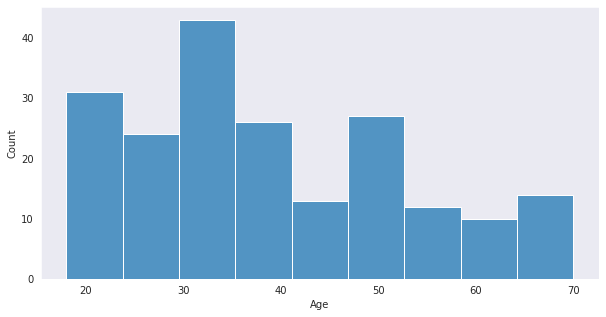

In [129]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age',data=readings)

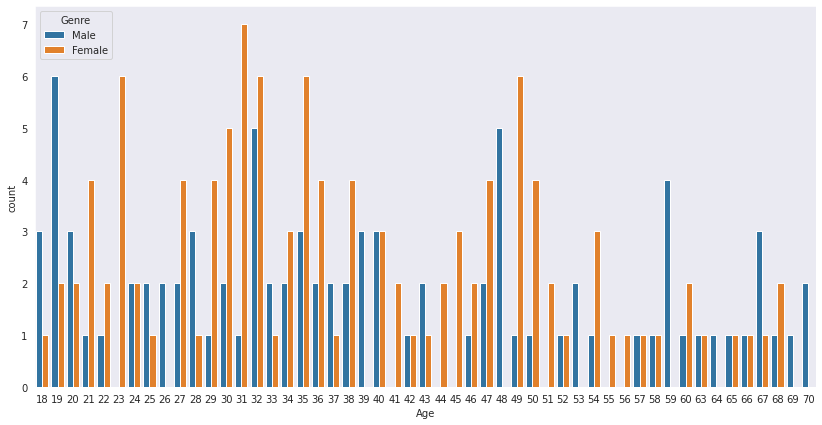

In [130]:
plt.figure(figsize=(14,7))
sns.countplot(x='Age',data=readings,hue="Genre")

***1st que solution***- From Graph, female with age group-23,31,35,49 and male with age group-19,32,48,59 usually go to mall.

 Que 2: Relation between age and Spending Score below

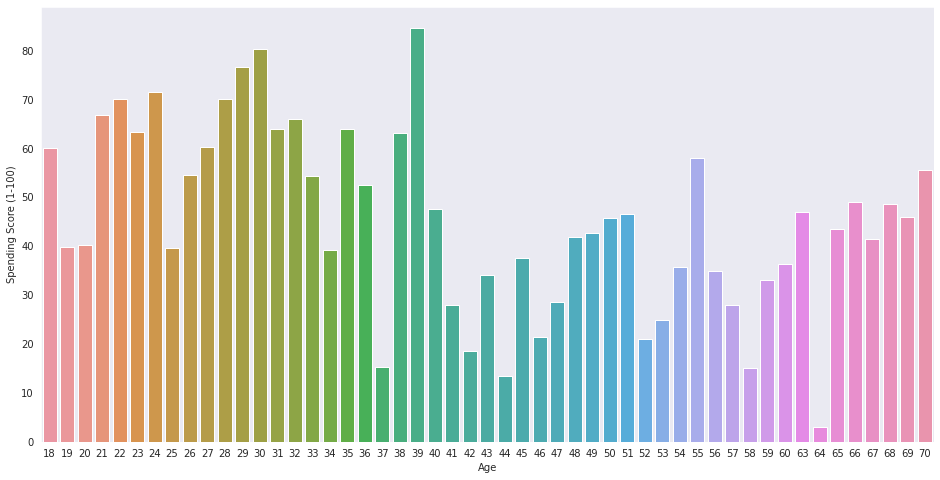

In [131]:
plt.figure(figsize=(16,8))
sns.barplot(x='Age',y="Spending Score (1-100)",data=readings,ci=None)


***2nd que solution***- From above graph approximately we can see that people's age ranging between 18-39 spend higher as compare to age group of people between 40-70

Que 2: Relation between age and annual income below

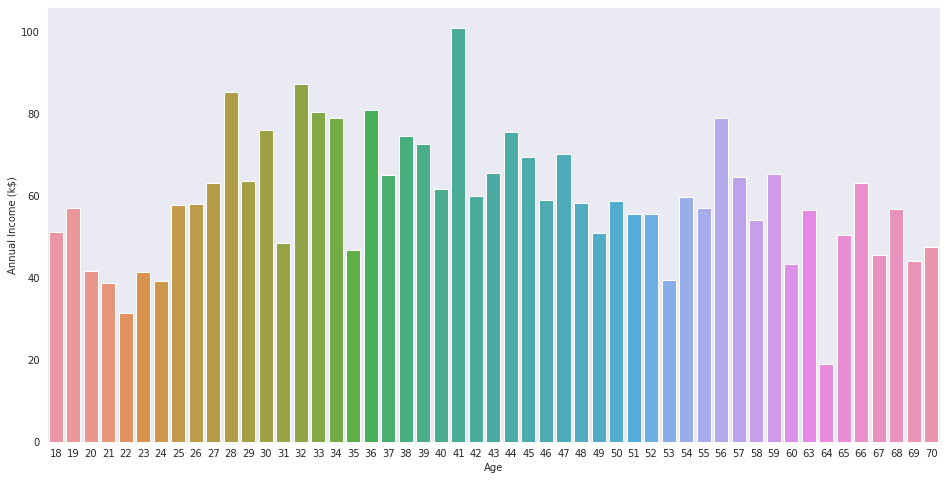

In [132]:
plt.figure(figsize=(16,8))
sns.barplot(x="Age",y="Annual Income (k$)", data=readings,ci=None)


***2nd que solution***- From above graph approximately we can see that people's age ranging between 28-47 have higher annual income as compare to other age group of people.

Que 3: Cluster of Annual Income (k$) vs Spending Score and observation reading accordingly

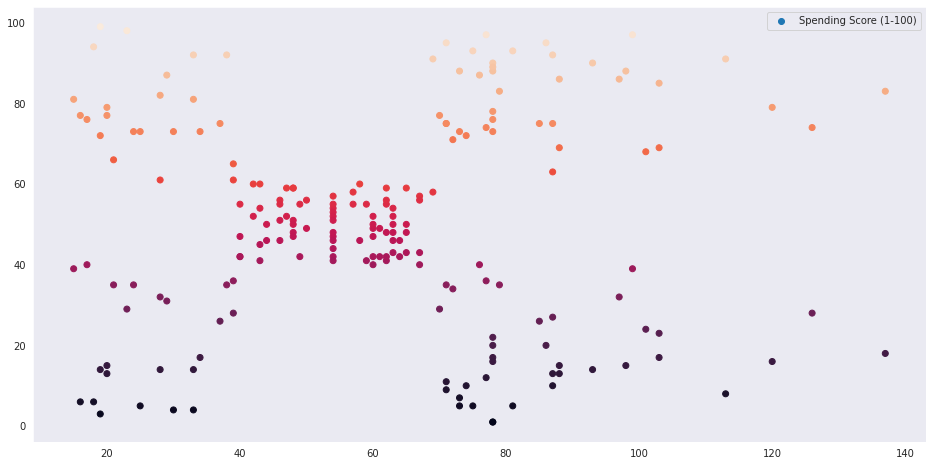

In [133]:
plt.figure(figsize=(16,8))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)",c="Spending Score (1-100)",data=readings)
plt.xlabel=('Annual Income')
plt.ylabel=('Spending Score')
plt.legend()
plt.show()


***3rd que solution***- By seeing above plot we can say no of clusters is 5 i.e approximately from 15-37, 38-70, 71-90, 91-110, 111-140 for x values. So to check using official method below i use Elbow Method to cross check.
**Readings:**
1)People having annual income between 20-40 have spending value between 0-40 and 60-90 in k dollar. 
2)People having annual income between 40-70 have spending value between 40-60 in k dollar

In [134]:
#Model Traning for elbow point
from sklearn.cluster import KMeans
kmeansforyvalue=[] 
for k in range(1,30): 
  fit_kmeans = KMeans(n_clusters=k)
  fit_kmeans.fit(readings.iloc[:,3:4]) 
  kmeansforyvalue.append(fit_kmeans.inertia_)

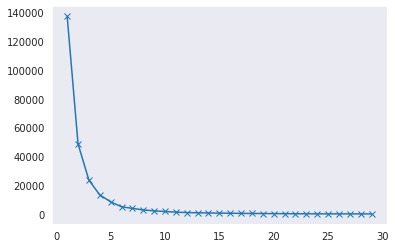

In [135]:
#ploting elbow point
plt.plot(range(1,30),kmeansforyvalue,marker='x')
plt.show()

From plot it can be seen that after 5 cross marks the graph is almost linear. So Verified i.e no of clusters are 5.